In [1]:
library(tm)
library(quanteda)
library(readxl)
library(stopwords)
library(readr)
library(igraph)
library(wordcloud)
library(wordcloud2)
library(SnowballC)
library(RColorBrewer)
library(ggraph)
library(textclean)

Loading required package: NLP

Warning message in stringi::stri_info():
"Your current locale is not in the list of available locales. Some functions may not work properly. Refer to stri_locale_list() for more details on known locale specifiers."
Warning message in stringi::stri_info():
"Your current locale is not in the list of available locales. Some functions may not work properly. Refer to stri_locale_list() for more details on known locale specifiers."
Package version: 3.3.1
Unicode version: 13.0
ICU version: 69.1

Parallel computing: 4 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: 'quanteda'


The following object is masked from 'package:tm':

    stopwords


The following objects are masked from 'package:NLP':

    meta, meta<-



Attaching package: 'stopwords'


The following object is masked from 'package:tm':

    stopwords



Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spec

In [2]:
getwd()

[1] "C:/Users/Dery Andrian/Downloads/R Analytics/GKR Hemas/News Analytics"

In [3]:
data <- read_excel("data\\Data Berita.xlsx")
berita <- data$Konten
berita

[1] "Untuk lebih memantapkan identitas Kampung Jogokariyan sebagai 'Kampung Budaya Jawa Ngayogyakarto Hadiningrat', maka kampung Jogokariyan menggelar lomba design motif batik, yang dapat memberikan ciri khas dan identitas Kampung Jogokariyan.\n\nTema yang diusung dalam lomba design batik kali ini yaitu, 'Batik Motif Jogokariyan Menjadi Identitas Budaya Jawa Ngayogyakarto Hadiningrat'.  Memperebutkan trofi GKR Hemas dan berhadiah total uang Rp 10 juta.\n\nHal tersebut disampaikan M Jazir ASP, Ketua Kampung Jogokariyan Kota Yogyakarta dalam kunjungan silaturahmi dengan jajaran Direksi PT BP Kedaulatan Rakyat (KR) di ruang Direksi KR, Jalan Margo Utomo 40-46 Yogya, Senin (5/6/2023). Diterima Dirut PT BP KR M Wirmon Samawi SE MIB dan Imam Satriadi SH (Direktur Keuangan). Saat silaturahmi M Jazir ASP didampingi panitia lomba Agus Triyatno (Ketua panitia), Mudjiono, Eko Teguh, Amirudin Hamzah, Djoko Sulasno, Sri Wahyuningsih dan Aries Krisnawan.\n\nLebih lanjut dikatakan Jazir ASP, tujuan kampung Jogokariyan mengadakan lomba design batik, di antaranya guna menggali ide kreatif dalam merancang motif batik yang dapat memberikan Kampung Jogokariyan. Selain untuk meningkatkan kecintaan dan kepedulian masyarakat terhadap pelestarian batik.\n\n\"Juga untuk meningkatkan promosi batik, khususnya batik bernuansa kearifan lokal yang semakin luas dikenal baik di tingkat nasional maupun Internasional,\" tutur Jazir.\n\nAgus Triyatno mengungkapkan, untuk mengikuti kegiatan lomba design batik ini, panitia penyelenggara menentukan sebanyak 14 kriteria yang harus diikuti peserta.\n\nDari 14 ketentuan itu, di antaranya peserta adalah umum dan atas nama perorangan. Lomba tidak dipungut biaya alias gratis. Panitia tidak menyediakan fasilitas alat, sarana dan prasarana untuk lomba.\n\n\"Karya para peserta belum pernah diikut-sertakan dalam apapun. Lomba ini dimulai Selasa (6/6) hingga Senin (26/6) mendatang. Design motif batik dapat diaplikasikan menjadi pakaian kemeja, blouse, busana muslim, blazer, merchandise (topi, tas, kaos urbane dan sebagainya,\" jelas Agus.\n\nDisebutkan, design batik diskripsi singkat yang mencakup judul karya, sumber ide dan alasannya yang dinarasikan di atas kertas HVS (A4), menggunakan huruf Times New Roman 12pt spasi 1,5.\n\n\"Karya design, diskripsi dan biodata peserta dimasukkan di dalam amplop tertutup dan di atas pojok sebelah kanan ditulisi Lomba Design Motif Batik Jogokariyan di kirim ke Sekretariat Masjid Jogokariyan, Jalan Jogokariyan No 36 Mantrijeron, Yogya selambat-lambatnya 26 Juni 2023, lewat email agus_triyatno@gmail.com atau WA 6285226406575.\n\nLomba dinilai 3 Juli dan diumumkan di media 5 Juli 2023. Kriteria penilaian meliputi motif (keunikan, artistik), komposisi warna, kreativitas dan keharmonisan antara judul, sumber ide dan motif. (Rar)"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
 [2] "GKR Hemas terpilih sekaligus ditetapkan menjadi Ketua Umum (Ketum) Lembaga Koordinasi Kesejahteraan Sosial 'BK3S' DIY periode 2023-2028 dalam musyawarah daerah LKKS 'BK3S' DIY yang berlangsung di Gedung LKKS 'BK3S' Jalan Tentara Rakyat Mataram, Badran JT I/704 Yogya, Sabtu (3/6).\n\nMusda yang dibuka Kepala Dinas Sosial DIY Endang Patmintarsih SH MSi, dihadiri utusan perwakilan LKS se DIY, seluruh Pengurus LKKS 'BK3S' DIY periode 2018-2023, penasehat LKKS 'BK3S' DIY, utusan LKKS Kabupaten/Kota, utusan Dinas Sosial DIY dan Dinas Sosial Kabupaten/Kota dan undangan khusus mitra kerja.\n\nSekretaris panitia penyelenggara Musda Tomy Hendraw

In [4]:
stopwords_id <- read_lines("data\\indonesian-stopwords-complete.txt")

In [6]:
myCorpus <- Corpus(VectorSource(data$Konten))
myCorpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 16

In [7]:
# convert to lower case
myCorpus <- tm_map(myCorpus, content_transformer(tolower))

# remove link
removeURL <- function(x) gsub("http[^[:space:]]*", "", x)
myCorpus <- tm_map(myCorpus, content_transformer(removeURL))

# remove anything other than English letters or space 
removeNumPunct <- function(x) gsub("[^[:alpha:][:space:]]*", "", x) 
myCorpus <- tm_map(myCorpus, content_transformer(removeNumPunct))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(removeURL)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(removeNumPunct)):
"transformation drops documents"


In [8]:
#Remove using stopwords
myCorpus <- tm_map(myCorpus, removeWords, stopwords_id)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, stopwords_id):
"transformation drops documents"


In [9]:
# remove extra whitespace
myCorpus <- tm_map(myCorpus, stripWhitespace)

# keep a copy for stem completion later
myCorpusCopy <- myCorpus

Warning message in tm_map.SimpleCorpus(myCorpus, stripWhitespace):
"transformation drops documents"


In [10]:
tdm <- TermDocumentMatrix(myCorpus, control = list(wordLengths = c(1, Inf)))
tdm

<<TermDocumentMatrix (terms: 1451, documents: 16)>>
Non-/sparse entries: 2058/21158
Sparsity           : 91%
Maximal term length: 20
Weighting          : term frequency (tf)

In [14]:
#find word freq
freq.terms <- findFreqTerms(tdm, lowfreq = 7)
freq.terms[1:50]

[1] "batik"       "budaya"      "design"      "gkr"         "hemas"      
 [6] "jawa"        "jogokariyan" "kampung"     "kegiatan"    "ketua"      
[11] "lomba"       "masyarakat"  "motif"       "panitia"     "peserta"    
[16] "sri"         "yogya"       "yogyakarta"  "bks"         "daerah"     
[21] "dinas"       "diy"         "kepala"      "ketum"       "lkks"       
[26] "pengurus"    "sosial"      "acara"       "atlet"       "bulutangkis"
[31] "hb"          "kejuaraan"   "koni"        "kraton"      "pbsi"       
[36] "sultan"      "x"           "dewasa"      "final"       "gelar"      
[41] "gusti"       "indonesia"   "istimewa"    "juara"       "kelompok"   
[46] "langsung"    "putri"       "sleman"      "tunggal"     "unggulan"

In [16]:
#grafik
term.freq <- rowSums(as.matrix(tdm))
term.freq <- subset(term.freq, term.freq >= 1000)
df <- data.frame(term = names(term.freq), freq = term.freq)
df

term,freq
<chr>,<dbl>


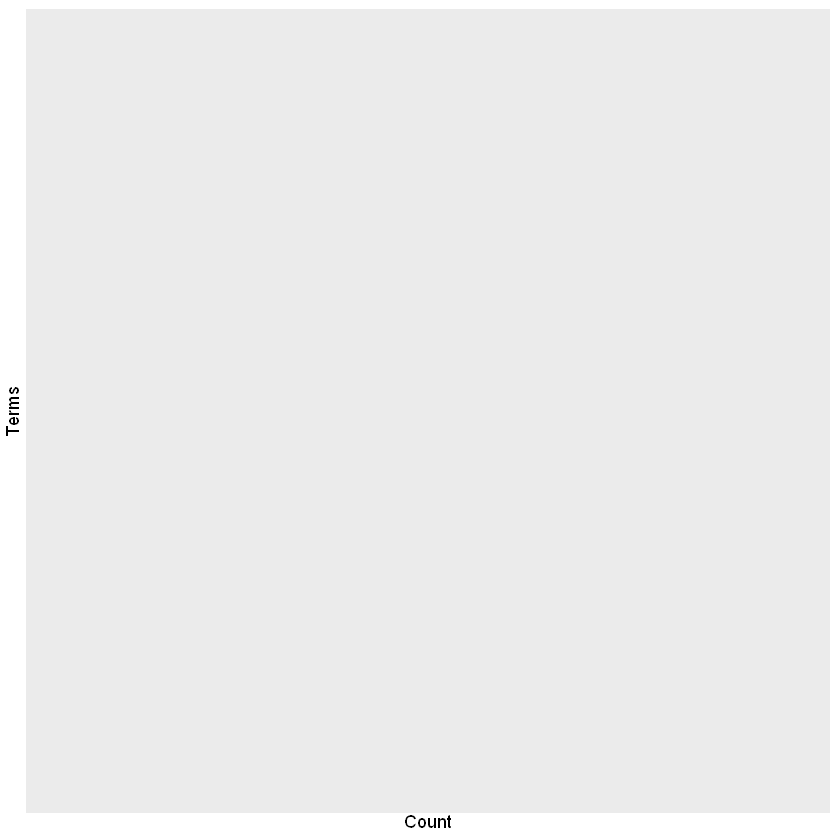

In [17]:
ggplot2::ggplot(df, aes(x=term, y=freq)) + geom_bar(stat="identity") +
  xlab("Terms") + ylab("Count") + coord_flip() +
  theme(axis.text=element_text(size=7))

In [19]:
m <- as.matrix(tdm)
m

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
a,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
agus,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
agustriyatnogmailcom,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alasannya,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alias,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amirudin,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amplop,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apapun,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aries,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# calculate the frequency of words and sort it by frequency 
word.freq <- sort(rowSums(m), decreasing = T)
word.freq

diy                hemas                  gkr 
                  85                   57                   45 
              bahasa           yogyakarta           masyarakat 
                  34                   26                   24 
                pbsi            pancasila                 jawa 
                  23                   21                   20 
           perempuan          bulutangkis             pengurus 
                  20                   18                   17 
              pemuda               daerah               sultan 
                  16                   15                   15 
               batik                ketua            indonesia 
                  14                   14                   14 
            kegiatan                yogya             unggulan 
                  13                   13                   13 
             anggota                lomba                  bks 
                  13                   12                   12 
                  ri                  sri               sosial 
                  12                   11                   11 
               final                  dpd           pariwisata 
                  11                   11                   11 
         jogokariyan                acara                putri 
                  10                   10                   10 
              faried                jayen                asean 
                  10                   10                   10 
             pameran               budaya                 lkks 
                  10                    9                    9 
                   x             kelompok             langsung 
                   9                    9                    9 
                jabo               travex               design 
                   9                    9                    8 
             peserta               kepala                atlet 
                   8                    8                    8 
                  hb            kejuaraan               kraton 
                   8                    8                    8 
              dewasa             istimewa                juara 
                   8                    8                    8 
             tunggal            semifinal          gunungkidul 
                   8                    8                    8 
                 pkk                  atf              kampung 
                   8                    8                    7 
               motif              panitia                dinas 
                   7                    7                    7 
               ketum                 koni                gelar 
                   7                    7                    7 
               gusti               sleman                calon 
                   7                    7                    7 
               utama                salah                 ikan 
                   7                    7                    7 
               makan             keamanan              seniman 
                   7                    7                    7 
             ekonomi             industri                djoko 
                   7                    7                    6 
               karya              kreatif                lokal 
                   6                    6                    6 
                nama             nasional               rakyat 
                   6                    6                    6 
                 rar                senin             provinsi 
                   6                    6                    6 
        undangundang             berhasil           pemerintah 
                   6                    6                    6 
               piala           kesempatan               pemain 
                   6                    6                    6 
                usia              politik        

In [25]:
#Wordcloud
d <- data.frame(word = names(word.freq),freq=word.freq)
a <- head(d,n=100)

wordcloud2(a,shape = "cloud",
           backgroundColor = "white",
           color = 'random-light' ,
           size = 1)

HTML widgets cannot be represented in plain text (need html)

In [26]:
head(d, n=10)

,word,freq
,<chr>,<dbl>
diy,diy,85
hemas,hemas,57
gkr,gkr,45
bahasa,bahasa,34
yogyakarta,yogyakarta,26
masyarakat,masyarakat,24
pbsi,pbsi,23
pancasila,pancasila,21
jawa,jawa,20


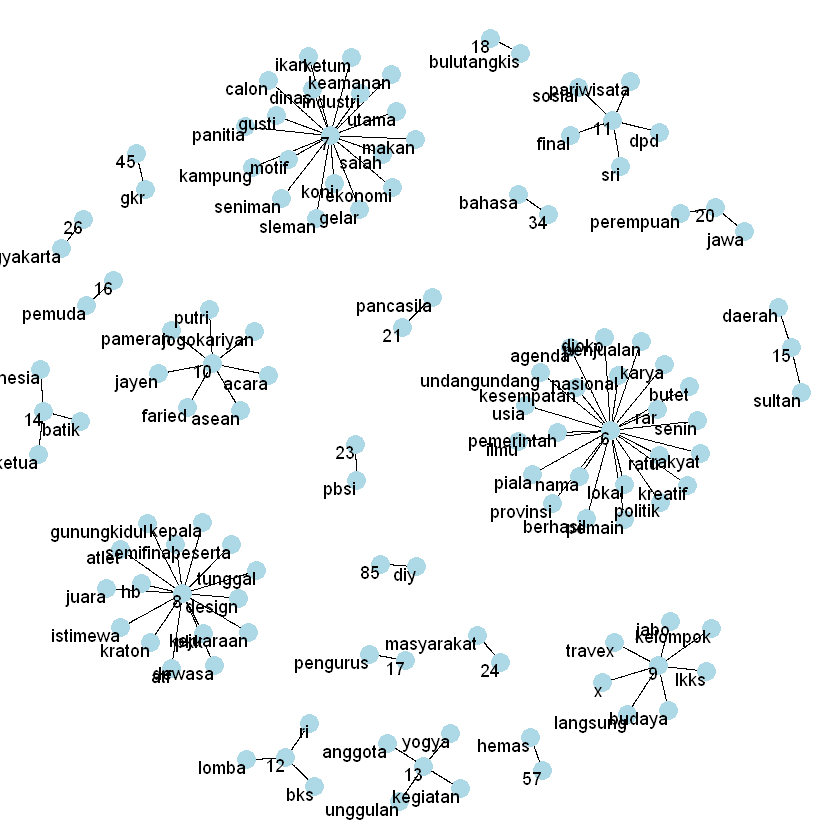

In [28]:
ggraph(a, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()
